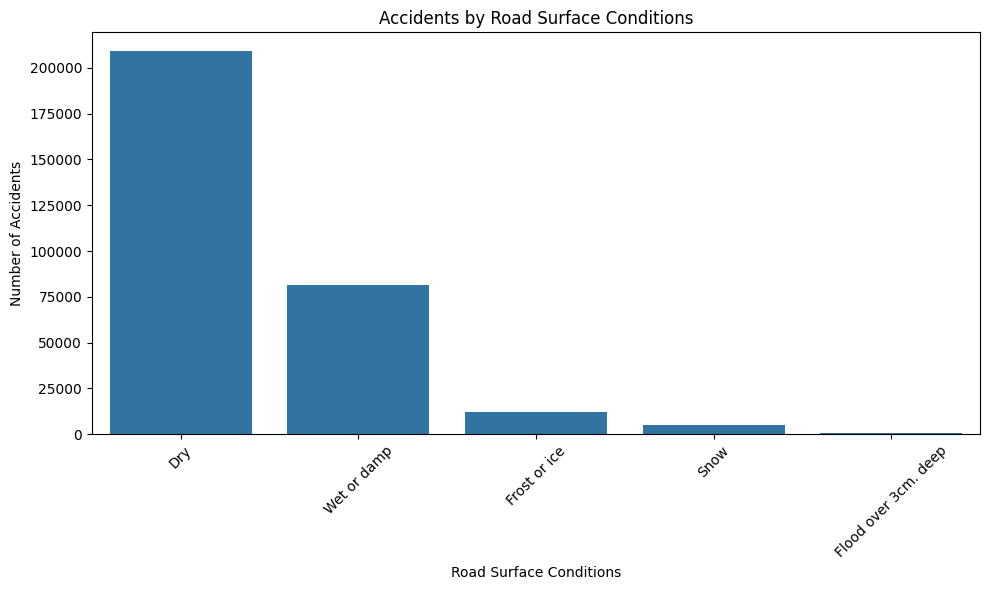

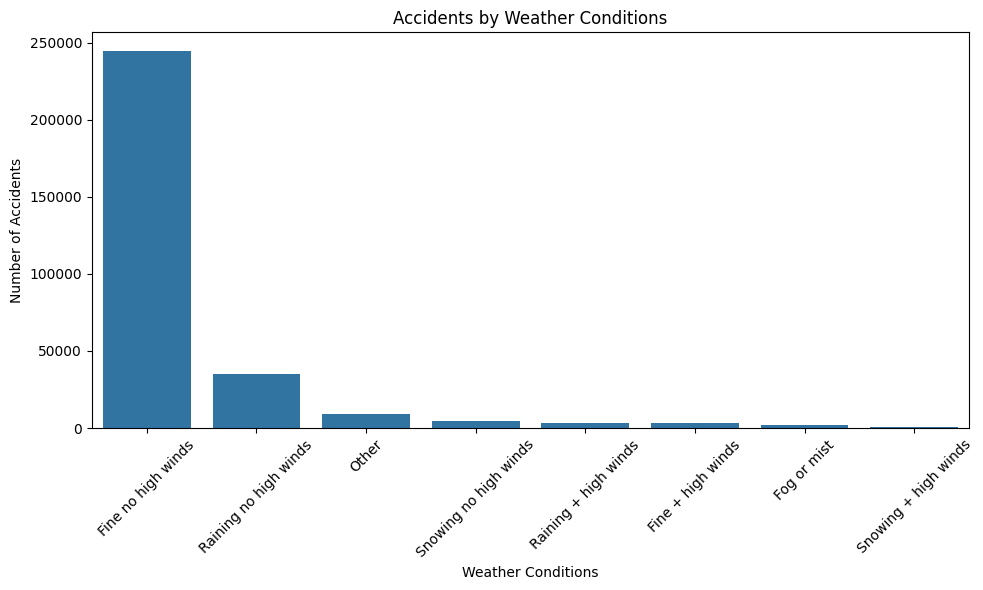

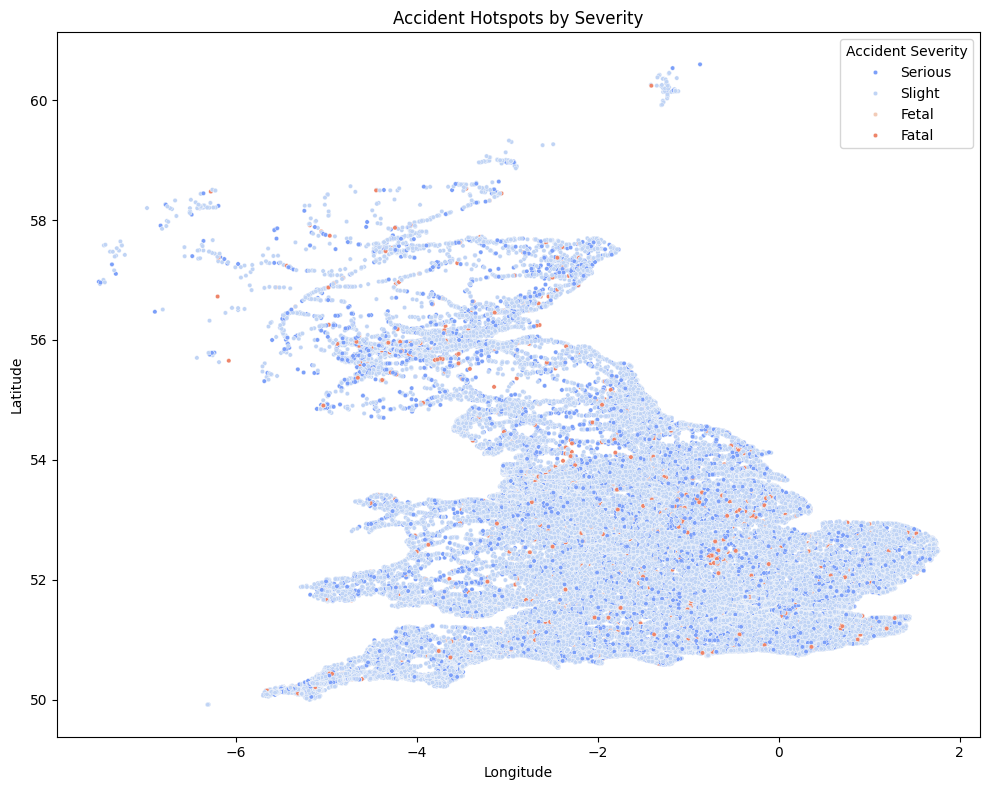

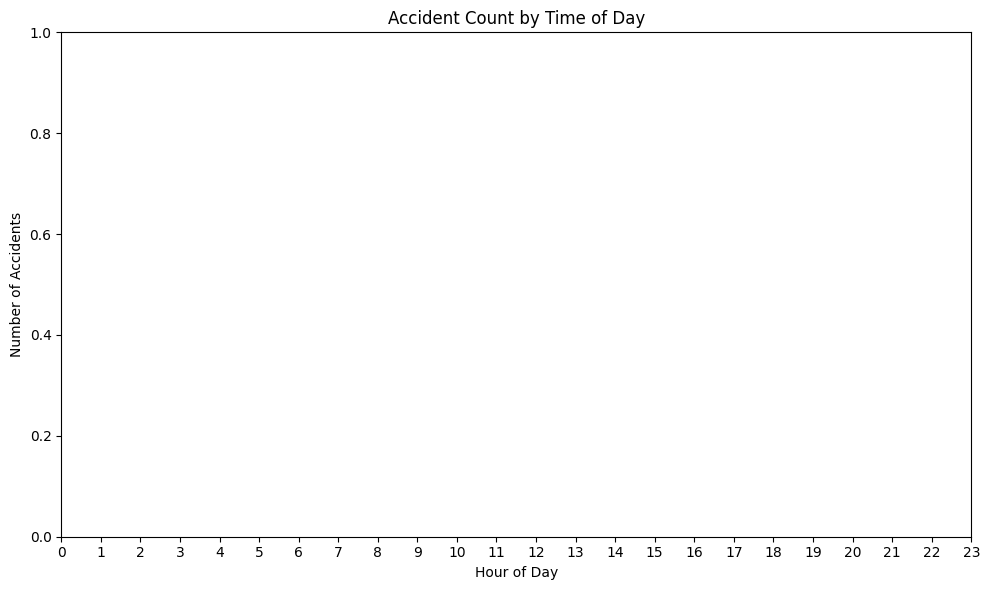

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

accident_data = pd.read_csv('/content/Road Accident Data.csv')


accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'], errors='coerce')
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M', errors='coerce').dt.time

relevant_columns = ['Accident_Severity', 'Day_of_Week', 'Road_Surface_Conditions',
                    'Weather_Conditions', 'Time', 'Latitude', 'Longitude']
filtered_data = accident_data[relevant_columns]


road_surface_count = filtered_data['Road_Surface_Conditions'].value_counts()

weather_condition_count = filtered_data['Weather_Conditions'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_count.index, y=road_surface_count.values)
plt.xticks(rotation=45)
plt.title('Accidents by Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Road Surface Conditions')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=weather_condition_count.index, y=weather_condition_count.values)
plt.xticks(rotation=45)
plt.title('Accidents by Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Conditions')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_data, x='Longitude', y='Latitude', hue='Accident_Severity', palette='coolwarm', s=10)
plt.title('Accident Hotspots by Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Accident Severity', loc='upper right')
plt.tight_layout()
plt.show()


accident_data['Hour'] = pd.to_datetime(accident_data['Time'], format='%H:%M', errors='coerce').dt.hour
accident_by_hour = accident_data['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=accident_by_hour.index, y=accident_by_hour.values, marker='o')
plt.title('Accident Count by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

<ipython-input-2-91b45217cda2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_data['Hour'] = accident_data['Time'].dt.hour
<ipython-input-2-91b45217cda2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_data['Time of Day'] = accident_data['Hour'].apply(categorize_time_of_day)


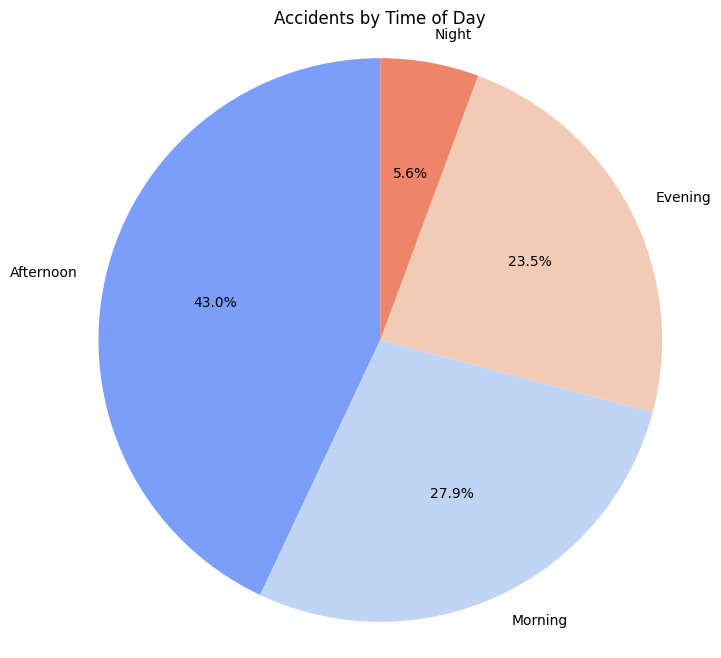

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


accident_data = pd.read_csv('/content/Road Accident Data.csv')


accident_data['Accident Date'] = pd.to_datetime(accident_data['Accident Date'], errors='coerce')
accident_data['Time'] = pd.to_datetime(accident_data['Time'], format='%H:%M', errors='coerce')


accident_data = accident_data.dropna(subset=['Time'])


accident_data['Hour'] = accident_data['Time'].dt.hour


def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'


accident_data['Time of Day'] = accident_data['Hour'].apply(categorize_time_of_day)


time_of_day_count = accident_data['Time of Day'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(time_of_day_count.values, labels=time_of_day_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(time_of_day_count)))
plt.title('Accidents by Time of Day')
plt.axis('equal')
plt.show()